# ImageDataGenerator with a Validation Set

This time, you will add a validation set so you can also measure how well the model performs on data it hasn't seen.

In [1]:
# Download the training set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2024-06-08 06:18:40--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.196.207, 142.251.162.207, 74.125.134.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.196.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M   145MB/s    in 1.0s    

2024-06-08 06:18:41 (145 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [2]:
# Download the validation set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

--2024-06-08 06:18:50--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.196.207, 142.251.162.207, 74.125.134.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.196.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘validation-horse-or-human.zip’

validation-horse-or 100%[===================>]  10.95M  42.3MB/s    in 0.3s    

2024-06-08 06:18:51 (42.3 MB/s) - ‘validation-horse-or-human.zip’ saved [11480187/11480187]



unzip both archives

In [3]:
import zipfile

# Unzip training set
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')

# Unzip validation set
local_zip = './validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./validation-horse-or-human')

zip_ref.close()

Define directories containing images

In [4]:
import os
#Directory with training horse images
train_horse_dir = os.path.join('./horse-or-human/horses')
#Directory with training human images
train_human_dir = os.path.join('./horse-or-human/humans')
#Directory with validation horse images
validatetion_horse_dir = os.path.join('./validation-horse-or-human/horses')
#Directory with validation human images
validatetion_human_dir = os.path.join('./validation-horse-or-human/humans')

Now see what the filenames look like in these directories:

In [5]:
train_horse_names = os.listdir(train_horse_dir)
print(f'TRAIN SET HORSES: {train_horse_names[:10]}')

train_human_names = os.listdir(train_human_dir)
print(f'TRAIN SET HUMANS: {train_human_names[:10]}')

validation_horse_names = os.listdir(validatetion_horse_dir)
print(f'VAL SET HORSES: {validation_horse_names[:10]}')

validation_human_names = os.listdir(validatetion_human_dir)
print(f'VAL SET HUMANS: {validation_human_names[:10]}')

TRAIN SET HORSES: ['horse09-0.png', 'horse32-1.png', 'horse14-0.png', 'horse17-3.png', 'horse36-9.png', 'horse11-4.png', 'horse35-4.png', 'horse15-8.png', 'horse47-4.png', 'horse13-5.png']
TRAIN SET HUMANS: ['human09-00.png', 'human11-18.png', 'human13-15.png', 'human08-30.png', 'human12-29.png', 'human09-11.png', 'human03-15.png', 'human01-08.png', 'human10-18.png', 'human03-30.png']
VAL SET HORSES: ['horse3-141.png', 'horse4-000.png', 'horse5-458.png', 'horse3-498.png', 'horse5-100.png', 'horse2-314.png', 'horse4-599.png', 'horse1-436.png', 'horse3-416.png', 'horse1-000.png']
VAL SET HUMANS: ['valhuman03-22.png', 'valhuman03-04.png', 'valhuman05-01.png', 'valhuman05-12.png', 'valhuman01-21.png', 'valhuman01-22.png', 'valhuman03-21.png', 'valhuman01-02.png', 'valhuman01-05.png', 'valhuman05-24.png']


In [6]:
print(f"total training horse images: {len(os.listdir(train_horse_dir))}")
print(f"total training human images: {len(os.listdir(train_human_dir))}")
print(f"total validation horse images: {len(os.listdir(validatetion_horse_dir))}")
print(f"total validation human images: {len(os.listdir(validatetion_human_dir))}")

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


Now take a look at a few pictures to get a better sense of what they look like

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph
nrows, ncols = 4, 4

# Index for iterating over images
pic_index = 0

In [8]:
#set up matplotlib figm and size it to 4x4
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname)
                 for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname)
                 for fname in train_human_names[pic_index-8:pic_index]]
for i,img_path in enumerate(next_horse_pix+next_human_pix):
    #set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') #turn of axis

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

Output hidden; open in https://colab.research.google.com to view.

# Building a Small Model from Scratch

In [9]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of image specified on the first layer
    #This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    #The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #The fifth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    #512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    #Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 64)        0

In [11]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])


Data Preprocessing

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)
# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 128 using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        './validation-horse-or-human/',  # This is the source directory for validation images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode = 'binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


# Training

Now train the model for 15 epochs. Here, you will pass parameters for validation_data and validation_steps. With these, you will notice additional outputs in the print statements: val_loss and val_accuracy. Notice that as you train with more epochs, your training accuracy might go up but your validation accuracy goes down. This can be a sign of overfitting and you need to prevent your model from reaching this point.

In [13]:
history = model.fit(
    train_generator,
    steps_per_epoch = 8, #batch_size/epochs = 128/15 = 8
    epochs = 15,
    verbose = 1,
    validation_data = validation_generator,
    validation_steps = 8
)

Epoch 1/15
8/8 [==============================] - 19s 1s/step - loss: 1.3188 - accuracy: 0.5673 - val_loss: 0.6901 - val_accuracy: 0.7383
Epoch 2/15
8/8 [==============================] - 8s 994ms/step - loss: 0.6906 - accuracy: 0.5284 - val_loss: 0.6709 - val_accuracy: 0.5273
Epoch 3/15
8/8 [==============================] - 9s 1s/step - loss: 0.7181 - accuracy: 0.6685 - val_loss: 0.6111 - val_accuracy: 0.8867
Epoch 4/15
8/8 [==============================] - 9s 1s/step - loss: 0.7859 - accuracy: 0.6630 - val_loss: 1.0735 - val_accuracy: 0.5000
Epoch 5/15
8/8 [==============================] - 8s 1s/step - loss: 0.5498 - accuracy: 0.7297 - val_loss: 1.9004 - val_accuracy: 0.5078
Epoch 6/15
8/8 [==============================] - 8s 997ms/step - loss: 0.5912 - accuracy: 0.6808 - val_loss: 1.2131 - val_accuracy: 0.7539
Epoch 7/15
8/8 [==============================] - 9s 1s/step - loss: 0.5528 - accuracy: 0.8320 - val_loss: 0.5587 - val_accuracy: 0.8164
Epoch 8/15
8/8 [==================

# Model Prediction

Now take a look at actually running a prediction using the model. This code will allow you to choose 1 or more files from your file system, upload them, and run them through the model, giving an indication of whether the object is a horse or a human.

Saving gelding-bay-coat.webp to gelding-bay-coat.webp
1/1 [==============================] - 0s 29ms/step
[6.6661144e-08]
gelding-bay-coat.webp is a horse


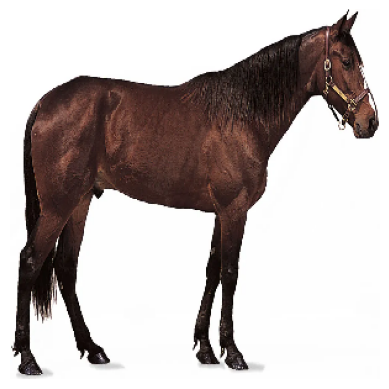

In [17]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()
for fn in uploaded.keys():
  #predict images
  path = '/content/' + fn
  img = load_img(path, target_size=(300,300))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  # Display the image
  plt.imshow(img)
  plt.axis('off')
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving images.webp to images (1).webp
1/1 [==============================] - 0s 17ms/step
[0.09890639]
images (1).webp is a human


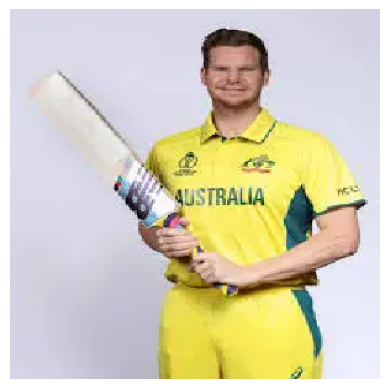

In [19]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()
for fn in uploaded.keys():
  #predict images
  path = '/content/' + fn
  img = load_img(path, target_size=(300,300))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  # Display the image
  plt.imshow(img)
  plt.axis('off')
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]<0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
